In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,roc_auc_score, roc_curve, confusion_matrix


In [3]:
# Load Battery RUL dataset
dataset = pd.read_csv('Battery_RUL.csv')


In [4]:
# Assuming the last column is the target variable (RUL) and the rest are features
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Initialize and train the Decision Tree regression model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [8]:
# Make predictions on the test set
y_pred = tree_model.predict(X_test)


In [9]:
# Set a threshold for binary classification (adjust as needed)
threshold = 50

# Convert predictions to binary labels
y_pred_binary = np.where(y_pred <= threshold, 1, 0)
y_test_binary = np.where(y_test <= threshold, 1, 0)

# Compute accuracy for binary classification
accuracy_binary = accuracy_score(y_test_binary, y_pred_binary)

print(f'Accuracy (Binary Classification): {accuracy_binary:.2%}')


Accuracy (Binary Classification): 99.67%


In [10]:
# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 28.818121473614337
R2 Score: 0.9997217941648363


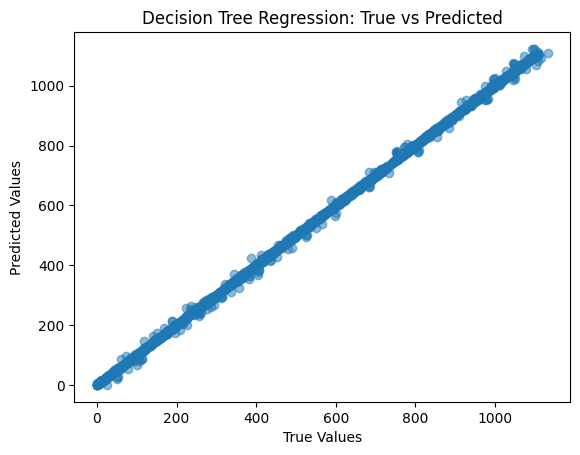

In [11]:
# Visualize the results
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Decision Tree Regression: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


In [12]:
# Evaluate AUC-ROC
roc_auc = roc_auc_score(y_test_binary, y_pred_binary)
print(f'AUC-ROC Score: {roc_auc:.2%}')


AUC-ROC Score: 98.54%


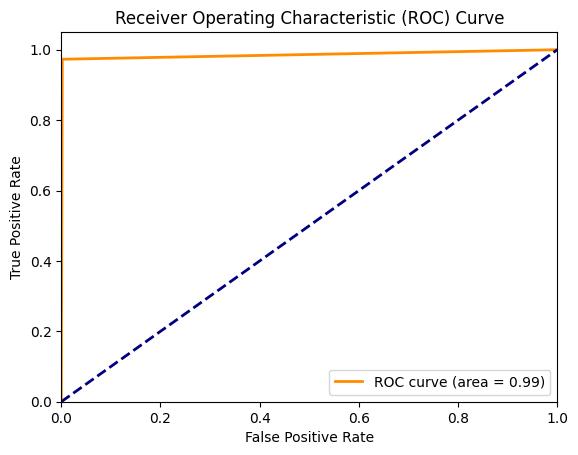

In [13]:
# Generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_binary)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[2859    6]
 [   4  144]]
